# College Students Placement Prediction

A realistic, large-scale synthetic dataset of 10,000 students designed to analyze factors affecting college placements.

This dataset simulates the academic and professional profiles of 10,000 college students, focusing on factors that influence placement outcomes. It includes features like IQ, academic performance, CGPA, internships, communication skills, and more.

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the dataset
placement_data = pd.read_csv('placement-data.csv')

In [3]:
#Print the first 5 records
placement_data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
placement_data.shape

(10000, 10)

There are 10,000 rows and 10 columns

In [5]:
placement_data.dtypes

College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object

In [6]:
#Statistical Summary
placement_data.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


##### By this statistical summary we can say that,
- The average CGPA of students is 7.53
- The average IQ is 99.47
- The max IQ is 158 and min IQ is 41
- The max CGPA is 10.46 and min CGPA is 4.54

In [7]:
placement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [8]:
#Checking the missing values
placement_data.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

There are no null values in the dataset

In [9]:
internship_data = placement_data.groupby('Internship_Experience')['Placement'].value_counts(normalize=True).mul(100).reset_index()

In [10]:
internship_data

,Internship_Experience,Placement,proportion
0,No,No,83.233930
1,No,Yes,16.766070
2,Yes,No,83.678103
3,Yes,Yes,16.321897


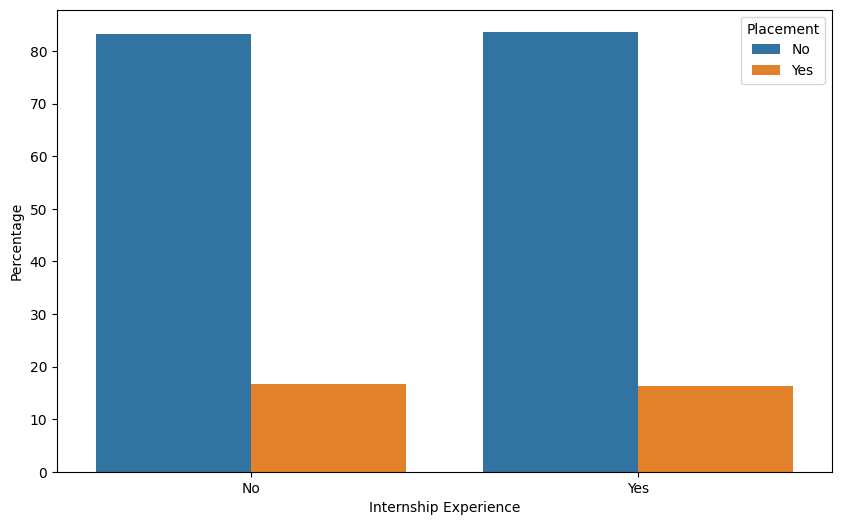

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='Internship_Experience',y='proportion',hue='Placement',data=internship_data)
plt.xlabel('Internship Experience')
plt.ylabel('Percentage')
plt.show()

##### From the above chart, we can infer that
- 16.76% of students with no internship experience have got the placement and the remaining 83.23% have not got the placement
- 16.32% of students with internship experience have got the placement and the remaining 83.67% have not got the placement

In [12]:
placement_data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


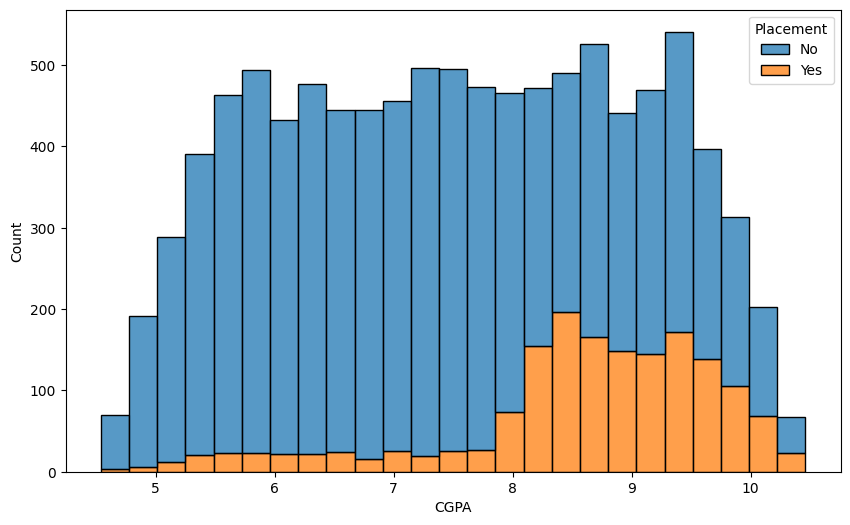

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(x='CGPA',hue='Placement',bins=25,multiple='stack',data=placement_data)
plt.show()

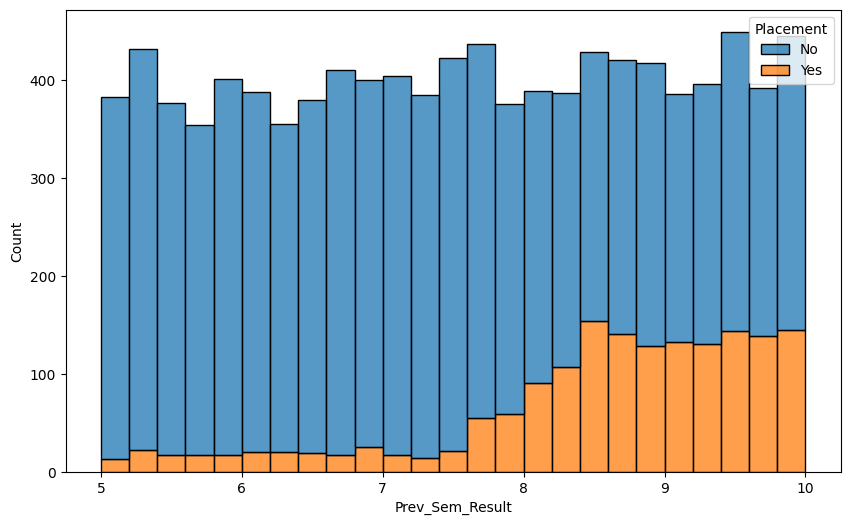

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(x='Prev_Sem_Result',hue='Placement',bins=25,multiple='stack',data=placement_data)
plt.show()

##### From this chart we can say that
- Students with 7.5 and above as previous semester results and current CGPA and above have given more placements

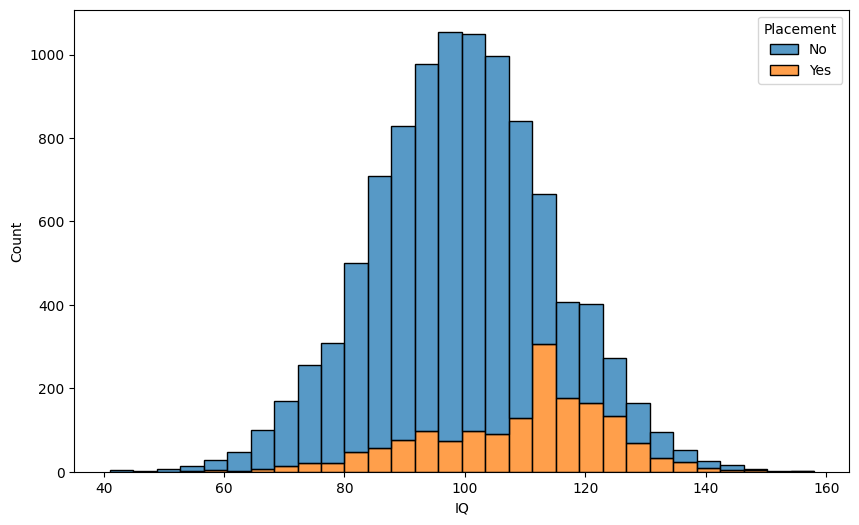

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(x='IQ',hue='Placement',bins=30,multiple='stack',data=placement_data)
plt.show()

##### From this chart we can say that
- Students with IQ in the range 80 - 135 have given more placements

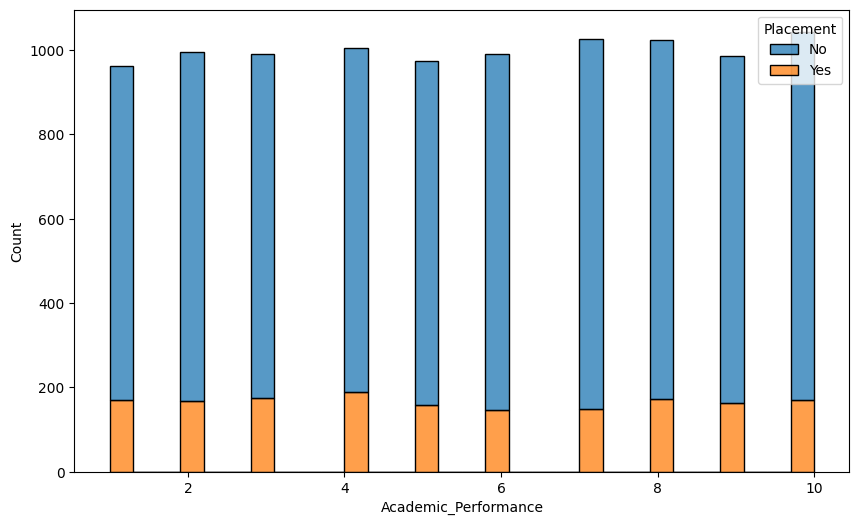

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(x='Academic_Performance',hue='Placement',bins=30,multiple='stack',data=placement_data)
plt.show()

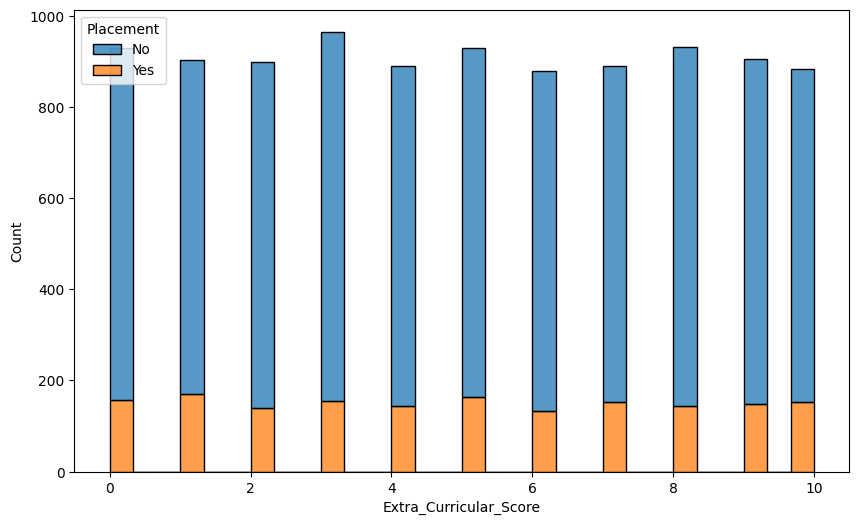

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(x='Extra_Curricular_Score',hue='Placement',bins=30,multiple='stack',data=placement_data)
plt.show()

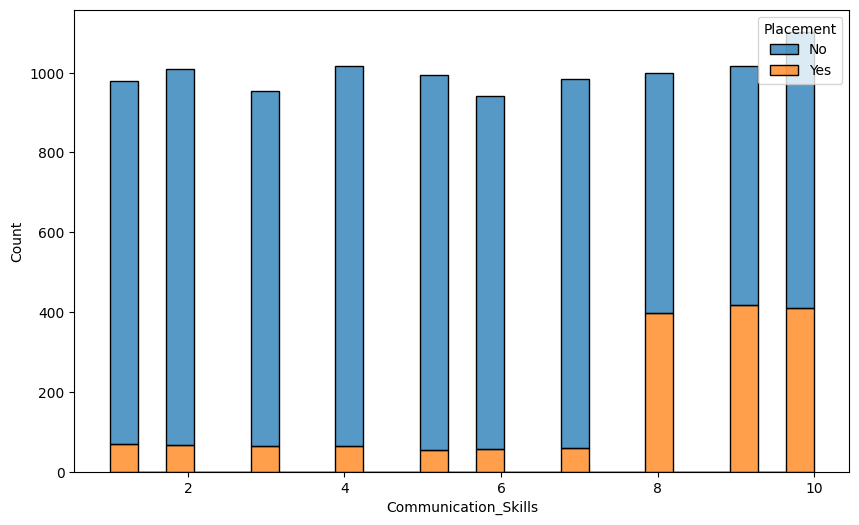

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(x='Communication_Skills',hue='Placement',bins=25,multiple='stack',data=placement_data)
plt.show()

##### From this chart we can say that
- Students with communication skill score 8 and above have got more placements

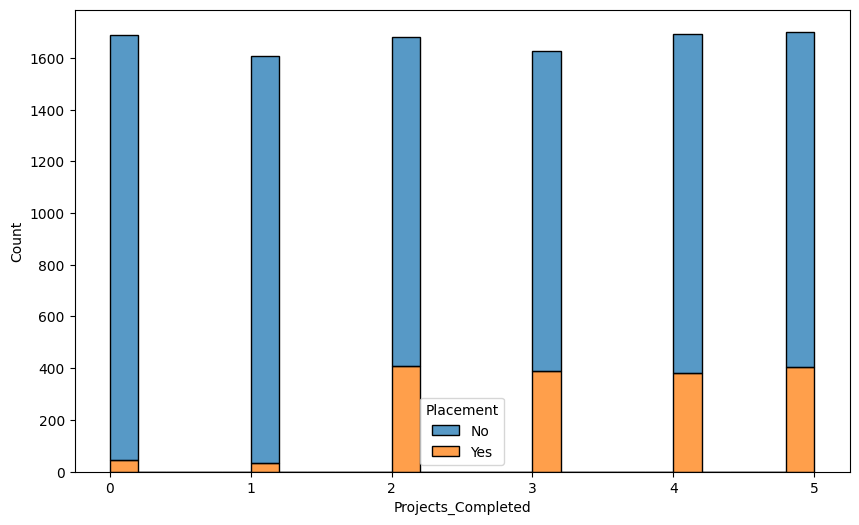

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(x='Projects_Completed',hue='Placement',bins=25,multiple='stack',data=placement_data)
plt.show()

##### From this chart we can say that
- Students with atleast 2 projects have got more placements

By performing data visualization we can conclude that CGPA, IQ, Communication Skills and Projects were most considered during College Placement

In [20]:
placement_data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [21]:
categorical_columns = placement_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = placement_data.select_dtypes(include=['int','float']).columns.tolist()

In [22]:
numerical_columns

['IQ',
 'Prev_Sem_Result',
 'CGPA',
 'Academic_Performance',
 'Extra_Curricular_Score',
 'Communication_Skills',
 'Projects_Completed']

In [23]:
categorical_columns

['College_ID', 'Internship_Experience', 'Placement']

In [24]:
del categorical_columns[0]

In [25]:
categorical_columns

['Internship_Experience', 'Placement']

In [26]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

scaler = StandardScaler()
encoder = LabelEncoder()

In [27]:
placement_data['IQ'] = scaler.fit_transform(placement_data[['IQ']])
placement_data['Prev_Sem_Result'] = scaler.fit_transform(placement_data[['Prev_Sem_Result']])
placement_data['CGPA'] = scaler.fit_transform(placement_data[['CGPA']])
placement_data['Academic_Performance'] = scaler.fit_transform(placement_data[['Academic_Performance']])
placement_data['Extra_Curricular_Score'] = scaler.fit_transform(placement_data[['Extra_Curricular_Score']])
placement_data['Communication_Skills'] = scaler.fit_transform(placement_data[['Communication_Skills']])
placement_data['Projects_Completed'] = scaler.fit_transform(placement_data[['Projects_Completed']])

In [28]:
placement_data['Internship_Experience'] = encoder.fit_transform(placement_data[['Internship_Experience']])
placement_data['Placement'] = encoder.fit_transform(placement_data[['Placement']])

C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
placement_data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,0.500135,-0.639521,-0.851919,0.853921,0,0.958593,0.840550,0.866381,0
1,CLG0061,-0.164214,-1.392572,-1.470939,0.853921,0,0.642131,0.840550,-1.464794,0
2,CLG0036,0.633004,-1.503111,-1.158028,1.201949,0,-0.623713,-1.572644,-0.882000,0
3,CLG0055,1.496657,-1.427115,-1.212447,0.157865,1,-1.256636,0.151066,-0.882000,0
4,CLG0004,-0.230648,0.258612,0.107220,0.505893,0,0.958593,1.530034,-0.299206,0


### Model Building

In [30]:
#Choosing the features and target variable
X = placement_data.drop('Placement',axis=1)
Y = placement_data['Placement']

In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold

In [34]:
#Split the training and testing set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [43]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression()

In [64]:
param_grid = {
    'penalty': ['l1', 'l2'], 
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'saga','lbfgs'],  
    'class_weight':['balanced']
}

In [65]:
cv = StratifiedKFold(n_splits=4,shuffle=True)

In [83]:
model = GridSearchCV(estimator=lr,param_grid=param_grid,cv=cv,verbose=2,scoring='accuracy')

In [85]:
model.fit(X_train,Y_train)

Fitting 4 folds for each of 42 candidates, totalling 168 fits
[CV] END C=0.0001, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, penalty=l1, so

C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
28 fits failed out of a total of 168.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs

,estimator,LogisticRegression()
,param_grid,"{'C': [0.0001, 0.001, ...], 'class_weight': ['balanced'], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [86]:
model.score(X_test,Y_test)

0.8665

In [87]:
model.score(X_train,Y_train)

0.84975

In [88]:
yhat = model.predict(X_test)

In [89]:
accuracy_score(Y_test,yhat)

0.8665

In [90]:
precision_score(Y_test,yhat)

0.5643564356435643

In [91]:
recall_score(Y_test,yhat)

0.858433734939759

In [92]:
f1_score(Y_test,yhat)

0.6810035842293907

In [93]:
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1668
           1       0.56      0.86      0.68       332

    accuracy                           0.87      2000
   macro avg       0.77      0.86      0.80      2000
weighted avg       0.90      0.87      0.88      2000



In [94]:
conf_matrix = confusion_matrix(Y_test,yhat)

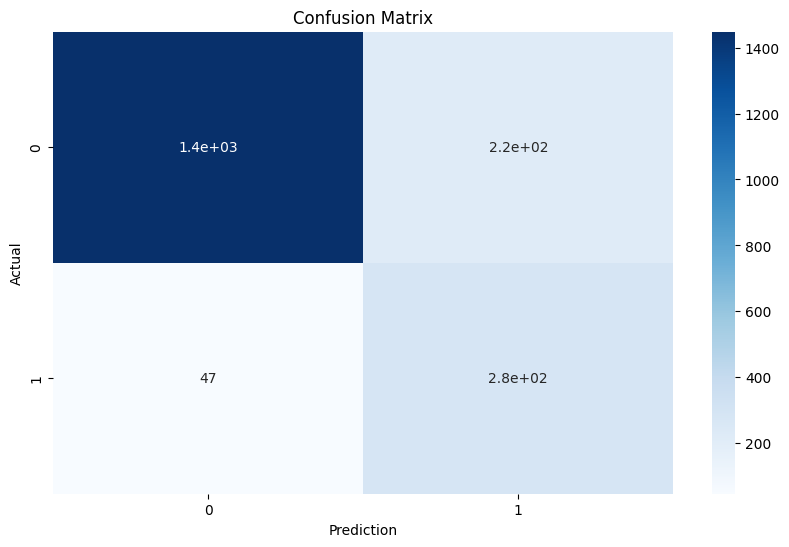

In [95]:
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix,annot=True,cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [96]:
best_model = model.best_estimator_

In [105]:
feature_importance = best_model.coef_[0]

In [108]:
X.drop('College_ID',axis=1,inplace=True)

In [111]:
feature_importance_df = pd.DataFrame(
    {
        'Features':X.columns,
        'Importance':feature_importance
    }
).sort_values(by='Importance',ascending=False)

In [112]:
feature_importance_df

,Features,Importance
6,Communication_Skills,1.873690
0,IQ,1.664882
2,CGPA,1.621089
7,Projects_Completed,1.202997
1,Prev_Sem_Result,0.272011
4,Internship_Experience,0.023600
3,Academic_Performance,-0.010237
5,Extra_Curricular_Score,-0.056061


In [113]:
predicted_df = pd.DataFrame({
    'College_ID':college_id,
    'Placement':yhat
})

In [116]:
predicted_df['Placement'] = encoder.inverse_transform(predicted_df[['Placement']])

C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
predicted_df

,College_ID,Placement
0,CLG0057,No
1,CLG0080,No
2,CLG0056,No
3,CLG0093,No
4,CLG0076,Yes
...,...,...
1995,CLG0053,No
1996,CLG0090,Yes
1997,CLG0041,Yes
1998,CLG0054,No


In [120]:
predicted_df.to_csv('Predicted_Data.csv')